In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df_x = pd.read_csv("./dataset/Linear_X_Train.csv")
df_y = pd.read_csv("./dataset/Linear_Y_Train.csv")

In [4]:
X = np.array(df_x)[:, 0]
Y = np.array(df_y)[:, 0]

In [5]:
X.shape
Y.shape

(3750,)

In [6]:
X[:5]

array([-0.28930742, -0.58880963,  1.02750749, -0.25901303,  0.78204318])

In [7]:
Y[:5]

array([ -0.09110112, -53.46772085,  75.45700878, -12.02528565,
        57.4141869 ])

In [9]:
# hyptothesis function or regression line
def line_hypothesis(x, theta):
    return theta[0] + theta[1]*x

# calculating total error
def err(X, Y, theta):
    m = X.shape[0]
    e = 0 # initial error value
    for i in range(m):
        hx = line_hypothesis(X[i], theta)
        e += (hx - Y[i])**2    
    return  e

def gradient(X, Y, theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = line_hypothesis(X[i], theta)
        grad[0] += hx - Y[i]
        grad[1] += (hx - Y[i])*X[i]
    return grad

# gradient descent function
def gradient_descent(X, Y, learning_rate = 0.0001):
    theta = np.zeros((2,))
    error_list = []
    for i in range(100):
        grad = gradient(X, Y, theta)
        e = err(X, Y, theta)
        error_list.append(e)
        theta[0]  = theta[0] - learning_rate*grad[0]
        theta[1]  = theta[1]  - learning_rate*grad[1]

    return error_list, theta

In [10]:
error_list, final_theta = gradient_descent(X, Y)

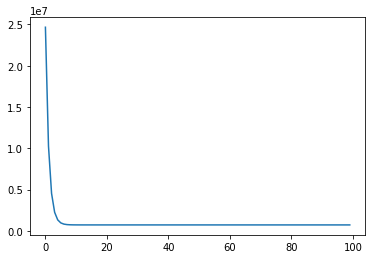

In [11]:
plt.plot(error_list);

In [12]:
df_test = pd.read_csv("./dataset/Linear_X_Test.csv")

In [13]:
test = np.array(df_test)[:, 0]

In [14]:
test.shape

(1250,)

In [15]:
m = test.shape[0]
outcome = np.empty([m], np.float64)
for i in range(m):
    outcome[i] = line_hypothesis(test[i], final_theta)



In [16]:
pd.DataFrame(outcome, columns=["Outcome"]).to_csv("Outcome.csv", index=None)

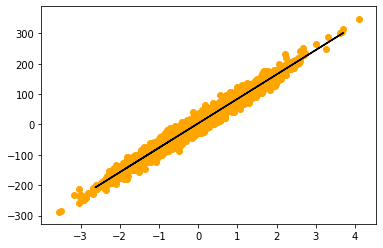

In [17]:
plt.plot(test, line_hypothesis(test, final_theta), color = "black")
plt.scatter(X, Y, color = "orange");

In [18]:
final_theta

array([ 3.72798828, 80.54363185])

## Calculating theta from direct method
- theta = (X^TX)^-1*(XY)

In [19]:
X_new = np.array(df_x)
Y_new = np.array(df_y)

In [23]:
X_new.shape

(3750, 1)

In [24]:
Y_new.shape

(3750, 1)

In [22]:
X_new.T.shape

(1, 3750)

In [25]:
np.dot(X_new.T, X_new).shape

(1, 1)

In [26]:
X_new

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

In [27]:
ones = np.ones((X_new.shape[0], 1))

X_new = np.hstack((ones, X_new))

In [28]:
X_new

array([[ 1.        , -0.28930742],
       [ 1.        , -0.58880963],
       [ 1.        ,  1.02750749],
       ...,
       [ 1.        , -0.30516366],
       [ 1.        ,  1.67583291],
       [ 1.        , -0.49175724]])

In [29]:
def getTheta(x, y):
    xt = x.T
    first_term = np.dot(xt, x)
    first_term = np.linalg.pinv(first_term)
    second_term = np.dot(xt, y)
    return np.dot(first_term, second_term)

In [30]:
theta = getTheta(X_new, Y_new)

In [31]:
theta

array([[ 3.72798828],
       [80.54363185]])

In [62]:
m = test.shape[0]
outcome = np.empty([m], np.float64)
for i in range(m):
    outcome[i] = line_hypothesis(test[i], theta)

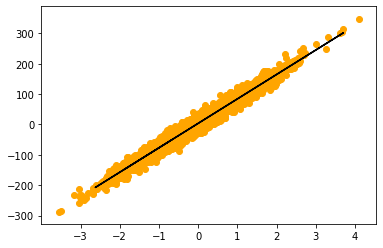

In [32]:
plt.plot(test, line_hypothesis(test, theta), color = "black")
plt.scatter(X, Y, color = "orange");

In [63]:
pd.DataFrame(outcome, columns=["Outcome"]).to_csv("Outcome.csv", index=None)